In [1]:
def generate_conversion_rate(prices):
    val = np.random.uniform(size=(len(prices)))
    conversion_rates = np.sort(val)[::-1]
    return conversion_rates

In [2]:
import matplotlib.pyplot as plt
from mab.environment import *
from mab.ts_learner import *
from mab.ucb_learner import *

#Customers
customerParams = zip([200,200,200,200], [50,50,50,50])
#discounts
discounts = np.array([0.0, 0.5, 0.10, 0.25])
#Conversion Rates for item 2 [discountedPrice x Class]
conv_rate2 = np.array([[0.1, 0.2, 0.15, 0.2],
                    [0.15, 0.25, 0.2, 0.25],
                    [0.2, 0.35, 0.25, 0.4],
                    [0.4, 0.45, 0.35, 0.6]])
                    
prices = [500, 600, 700, 750, 850, 900, 1000]
arms = prices #TODO:change this value
n_classes = 4

conv_rate1 = np.array([0.4, 0.3, 0.3, 0.25, 0.2, 0.15, 0.1])
 
max_conv = np.argmax(conv_rate1)

opt = conv_rate1[max_conv]
print(opt)
 
max_conv = np.argmax(conv_rate1)

opt = conv_rate1[max_conv]
print(opt)

0.4
0.4


In [3]:
#Optimum = max(arm*conv_1)
#UCB explodes for higher conversion rates

n_experiments = 300
customerParams = zip([20, 20, 20, 20], [5,5,5,5])
env = Environment(customerParams, discounts, prices, conv_rate1, conv_rate2)
ts_learner =TS_Learner(arms=arms)      
u_learner = UCB(n_arms=len(arms))

ts_rewards_per_class_per_day = []
u_rewards_per_class_per_day = []

for day in range(n_experiments):
    ts_rewards_per_experiment = [] 
    u_rewards_per_experiment = []
    for customer in range(np.max(env.customers)):
        #When a class consumes all customers, stop updating and adding more reward
        to_be_updated = env.customers > customer 

        ts_pulled_arms = ts_learner.pull_arm_per_class()
        ts_reward = env.round1_per_class(ts_pulled_arms)
        ts_learner.update(ts_pulled_arms, ts_reward, to_be_updated)
        #Optimum - reward*arm[pulled]
        ts_rewards_per_experiment.append(sum(np.max(np.array(arms)*np.array(conv_rate1))*np.array(to_be_updated, dtype= int)) - sum(np.array(arms)[ts_pulled_arms]*np.array(ts_reward)*np.array(to_be_updated, dtype= int)))

        u_pulled_arms = u_learner.pull_arm_per_class()
        u_reward = env.round1_per_class(u_pulled_arms)
        u_learner.update(u_pulled_arms, u_reward, to_be_updated)
        u_rewards_per_experiment.append(sum(np.max(np.array(arms)*np.array(conv_rate1))*np.array(to_be_updated, dtype= int)) - sum(np.array(arms)[u_pulled_arms]*np.array(u_reward)*np.array(to_be_updated, dtype= int)))
    
    ts_rewards_per_class_per_day.append([ts_rewards_per_experiment])
    u_rewards_per_class_per_day.append([u_rewards_per_experiment])

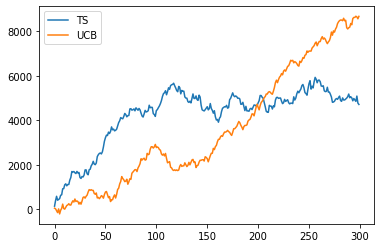

In [4]:
plt.plot(np.cumsum(np.mean(ts_rewards_per_class_per_day, axis=2)))
plt.plot(np.cumsum(np.mean(u_rewards_per_class_per_day, axis=2)))
plt.legend(['TS', 'UCB'])